<a href="https://colab.research.google.com/github/sarnavadatta/Predictive-Modelling/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/My Drive/DS projects/Churn Prediction/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Checking the data types of all the columns
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# MonthlyCharges column is float, but TotalCharges column is object.
# Converting the Total Charges column to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())
    print("--------------------")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
--------------------
gender
['Female' 'Male']
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------
Partner
['Yes' 'No']
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------
Dependents
['No' 'Yes']
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------
PhoneService
['No' 'Yes']
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------
MultipleLines
['No phone service' 'No' 'Yes']
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------
InternetService
['DSL' 'Fiber optic' 'No']
Intern

In [ ]:
# Checking for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
#Removing missing values
df.dropna(how = 'any', inplace = True)

# Since the % of these records compared to total dataset is very low ie 0.15%,
# it is safe to ignore them from further processing.

In [ ]:
df.shape

(7032, 21)

In [ ]:
# checking the tenure
df.tenure.value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
38,59
28,57
39,56


<Axes: xlabel='tenure', ylabel='Density'>

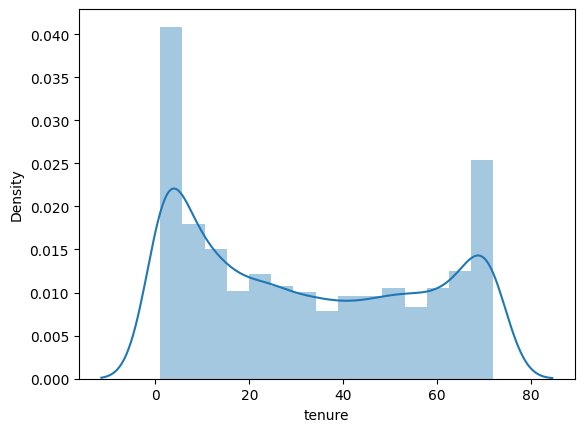

In [ ]:
# plot a distribution of df.tenure

sns.distplot(df.tenure)

In [ ]:
# Create a new column called tenure group.
# Then divide customers into bins based on tenure
# e.g. for tenure < 12 months: assign a tenure group if 1, for tenure between 1 to 2 Yrs, tenure group of 2; so on...

df['tenure_group'] = pd.cut(df['tenure'],
                           bins = [0, 12, 24, 36, 48, 60, 72],
                           labels =[1,2,3,4,5,6]) # ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


**Univariate Analysis**

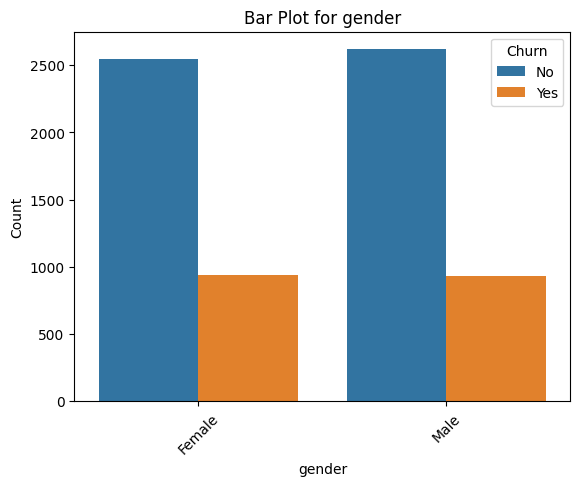

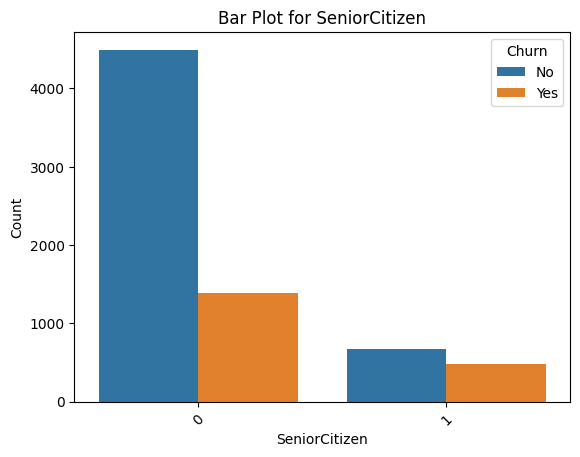

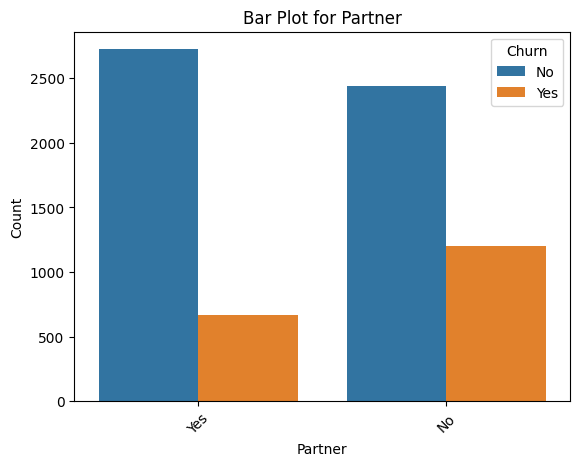

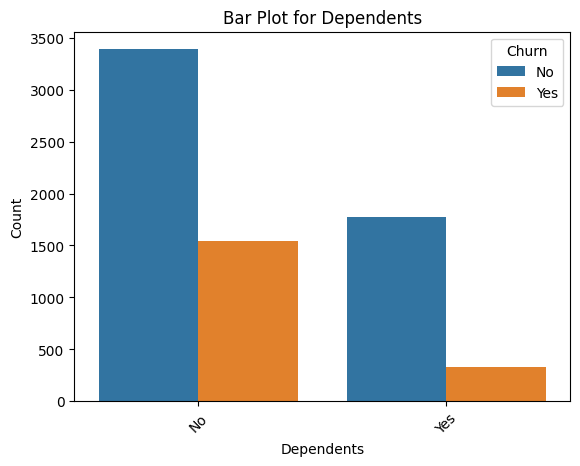

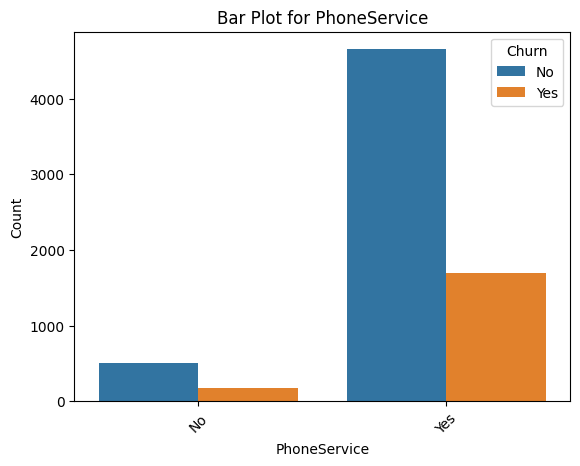

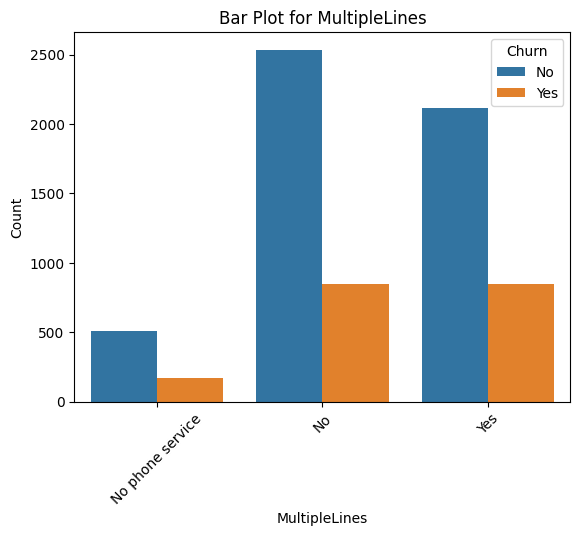

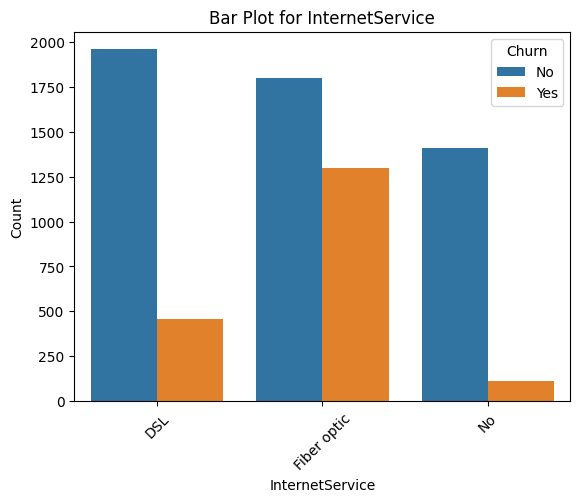

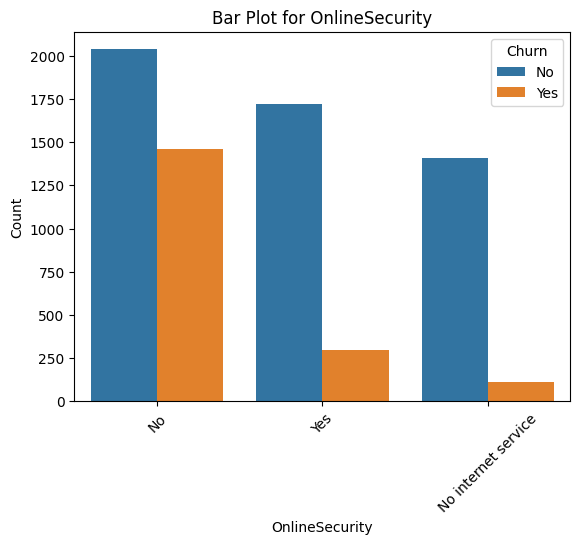

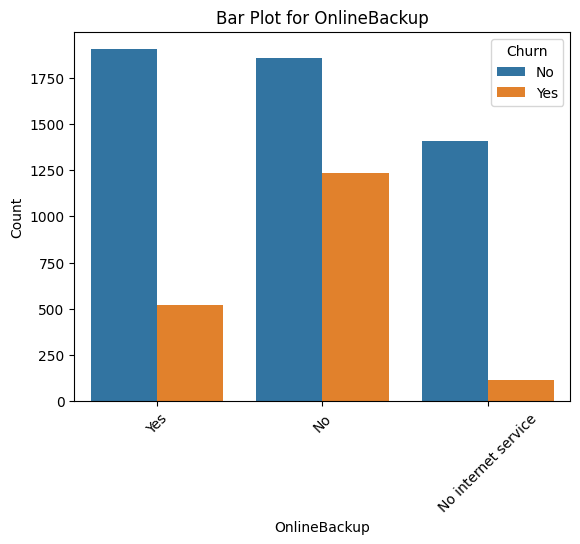

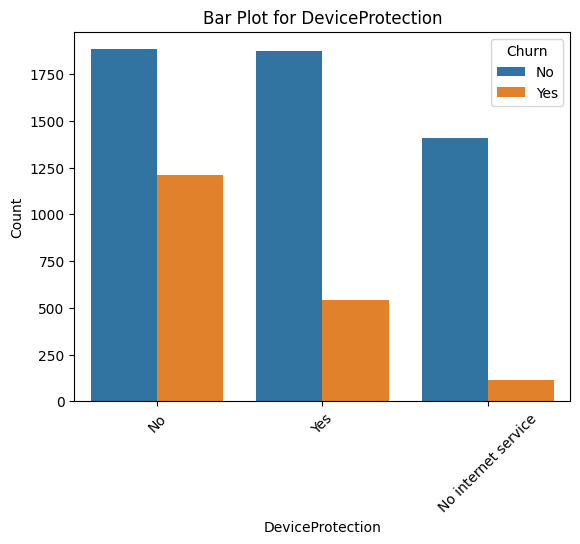

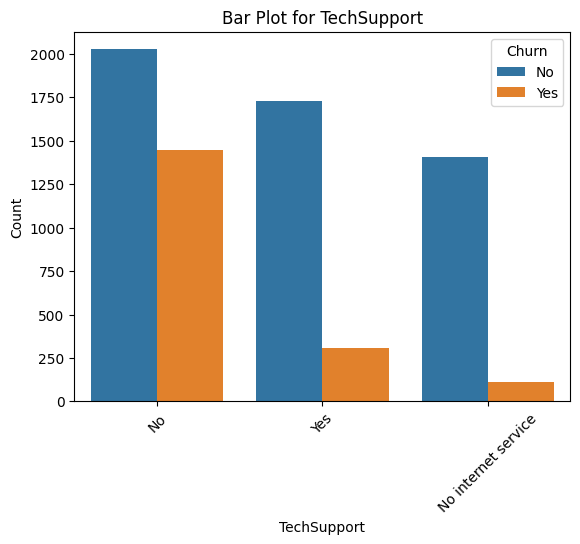

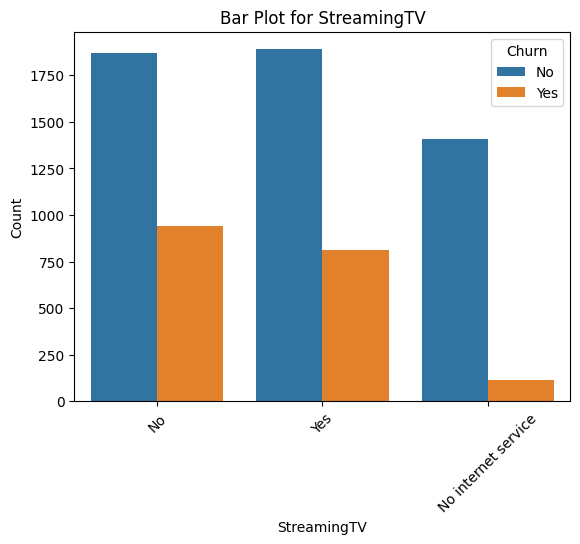

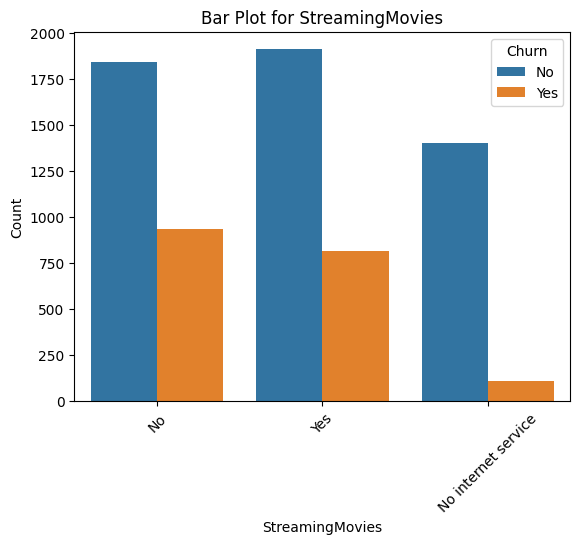

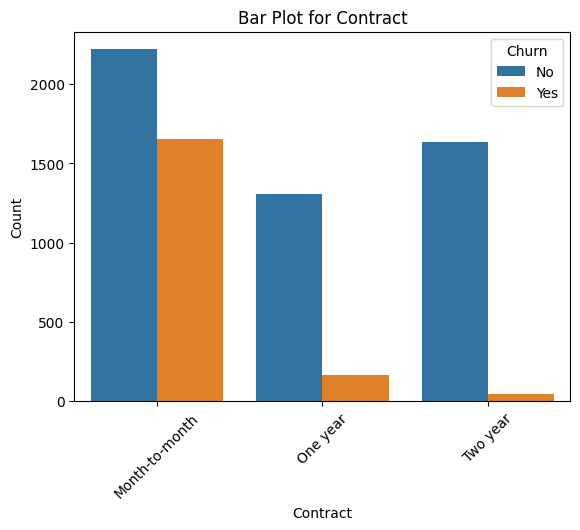

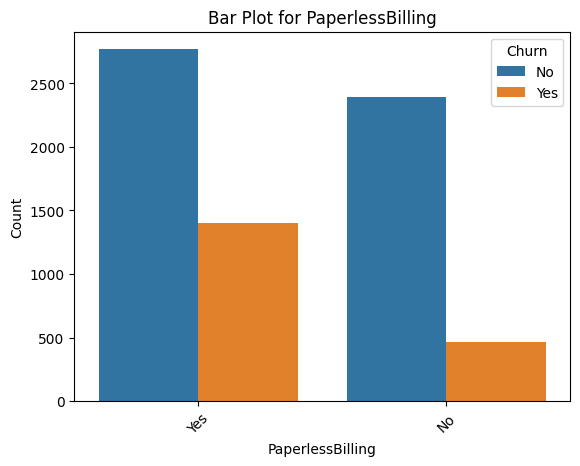

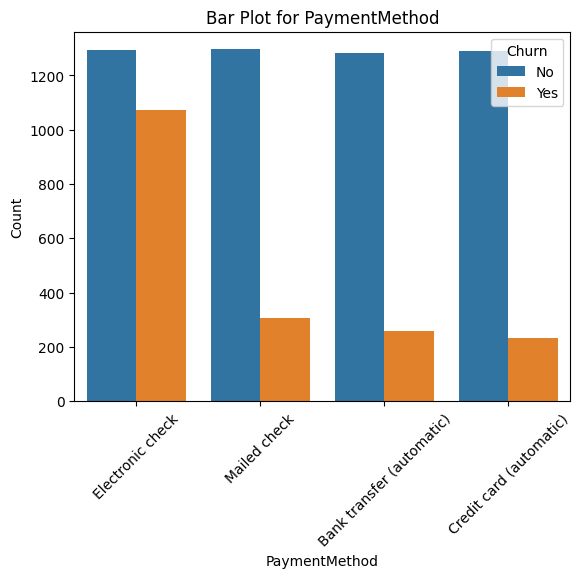

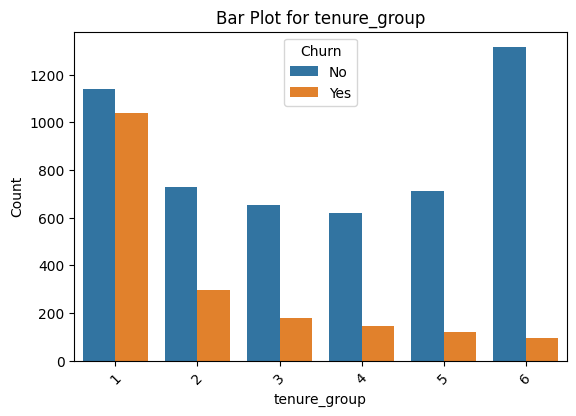

In [ ]:
for i, col in enumerate(df.drop(columns=['customerID', 'Churn', 'tenure', 'TotalCharges', 'MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=df, x=col, hue='Churn')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
  plt.title(f"Bar Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")


plt.tight_layout(pad=3)
plt.show()


In [ ]:
df.drop(columns=['customerID', 'Churn', 'TotalCharges', 'MonthlyCharges'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


### Observations from Univariate Analysis:

Based on the provided code and the count plots generated for various categorical features against 'Churn', here are some key observations:

*   **Gender:** The churn rate appears to be relatively balanced between male and female customers. There isn't a clear indication that one gender is significantly more likely to churn than the other.
*   **Senior Citizen:** Senior citizens appear to have a higher churn rate compared to non-senior citizens.
*   **Partner:** Customers without a partner seem to have a higher churn rate than those with a partner.
*   **Dependents:** Customers without dependents appear to have a significantly higher churn rate than those with dependents. This suggests that having dependents might be a factor in customer retention.
*   **Phone Service:** Customers with phone service show churn, while those without phone service do not. This is likely because the dataset focuses on a telecommunications company, so having phone service is a prerequisite for experiencing churn within this context. However, the proportion of churn among those with phone service is important.
*   **Multiple Lines:** Customers with multiple lines seem to have a slightly higher churn rate compared to those with a single line. Customers without phone service (who by definition also don't have multiple lines) don't churn.
*   **Internet Service:** Customers with Fiber optic internet service show a considerably higher churn rate compared to those with DSL internet service or no internet service. This is a significant observation.
*   **Online Security:** Customers without online security service show a much higher churn rate than those with the service.
*   **Online Backup:** Similar to online security, customers without online backup service show a higher churn rate than those with the service.
*   **Device Protection:** Customers without device protection service have a higher churn rate than those with the service.
*   **Tech Support:** Customers without tech support service have a substantially higher churn rate than those with the service.
*   **Streaming TV:** Customers who stream TV show a higher churn rate than those who do not stream TV or have no internet service.
*   **Streaming Movies:** Similar to streaming TV, customers who stream movies show a higher churn rate than those who do not stream movies or have no internet service.
*   **Contract:** Customers with month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. This is a very strong indicator of churn risk.
*   **Paperless Billing:** Customers with paperless billing have a higher churn rate than those without paperless billing.
*   **Payment Method:** Customers using Electronic check payment method have the highest churn rate among all payment methods.

These observations from the univariate analysis provide initial insights into the factors that might influence customer churn and can guide further bivariate and multivariate analysis.

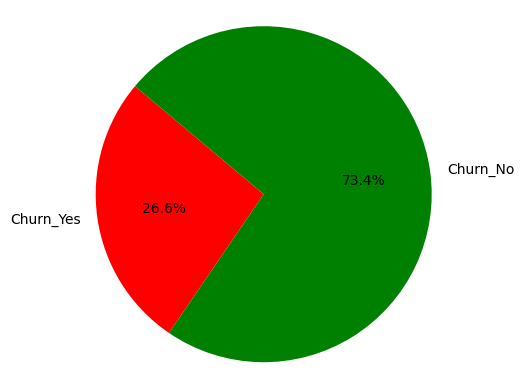

In [ ]:
Churn_Yes = sum(df[df['Churn']=='Yes'].count())
Churn_No = sum(df[df['Churn']=='No'].count())

# Data to plot
labels = 'Churn_Yes', 'Churn_No'
sizes = [Churn_Yes,Churn_No]
colors = ['red', 'green']
#explode = (0.5, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
# Create a new dataframe called df_updated.
# transform the Churn column - No: 0, Yes: 1
# Use the preprocessor transformer to every column apart from Churn column.

df_updated = df.copy()

# Transform Churn column
df_updated['Churn'] = df_updated['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate features and target
X = df_updated.drop(columns=['Churn', 'customerID','tenure'], axis=1)  # Exclude customerID as it's not a feature
y = df_updated['Churn']

# Identify categorical and numerical features (excluding 'Churn' and 'customerID')
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns


In [ ]:
categorical_features, numerical_features

(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure_group'], dtype='object'))

In [ ]:
# # separate dataset into train and test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
# X_train.shape, X_test.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
OHE_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", OHE_transformer, categorical_features),
          ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
new_df = pd.DataFrame(X_preprocessed)
new_df['Churn'] = y.values

In [ ]:
# Get the new column names after preprocessing
new_column_names = preprocessor.get_feature_names_out()

# Assign column names to the new dataframe
new_df.columns = list(new_column_names) + ['Churn']

# change the column names like OneHotEncoder__gender_Male: OHE_gender_Male, and StandardScaler__MonthlyCharges: SC_MonthlyCharges and so on...
new_columns = []
for col in new_df.columns:
  if col.startswith('OneHotEncoder__'):
    new_columns.append('OHE_' + col.split('__', 1)[1])
  elif col.startswith('StandardScaler__'):
    new_columns.append('SC_' + col.split('__', 1)[1])
  else:
    new_columns.append(col)

new_df.columns = new_columns

print(new_df.columns)

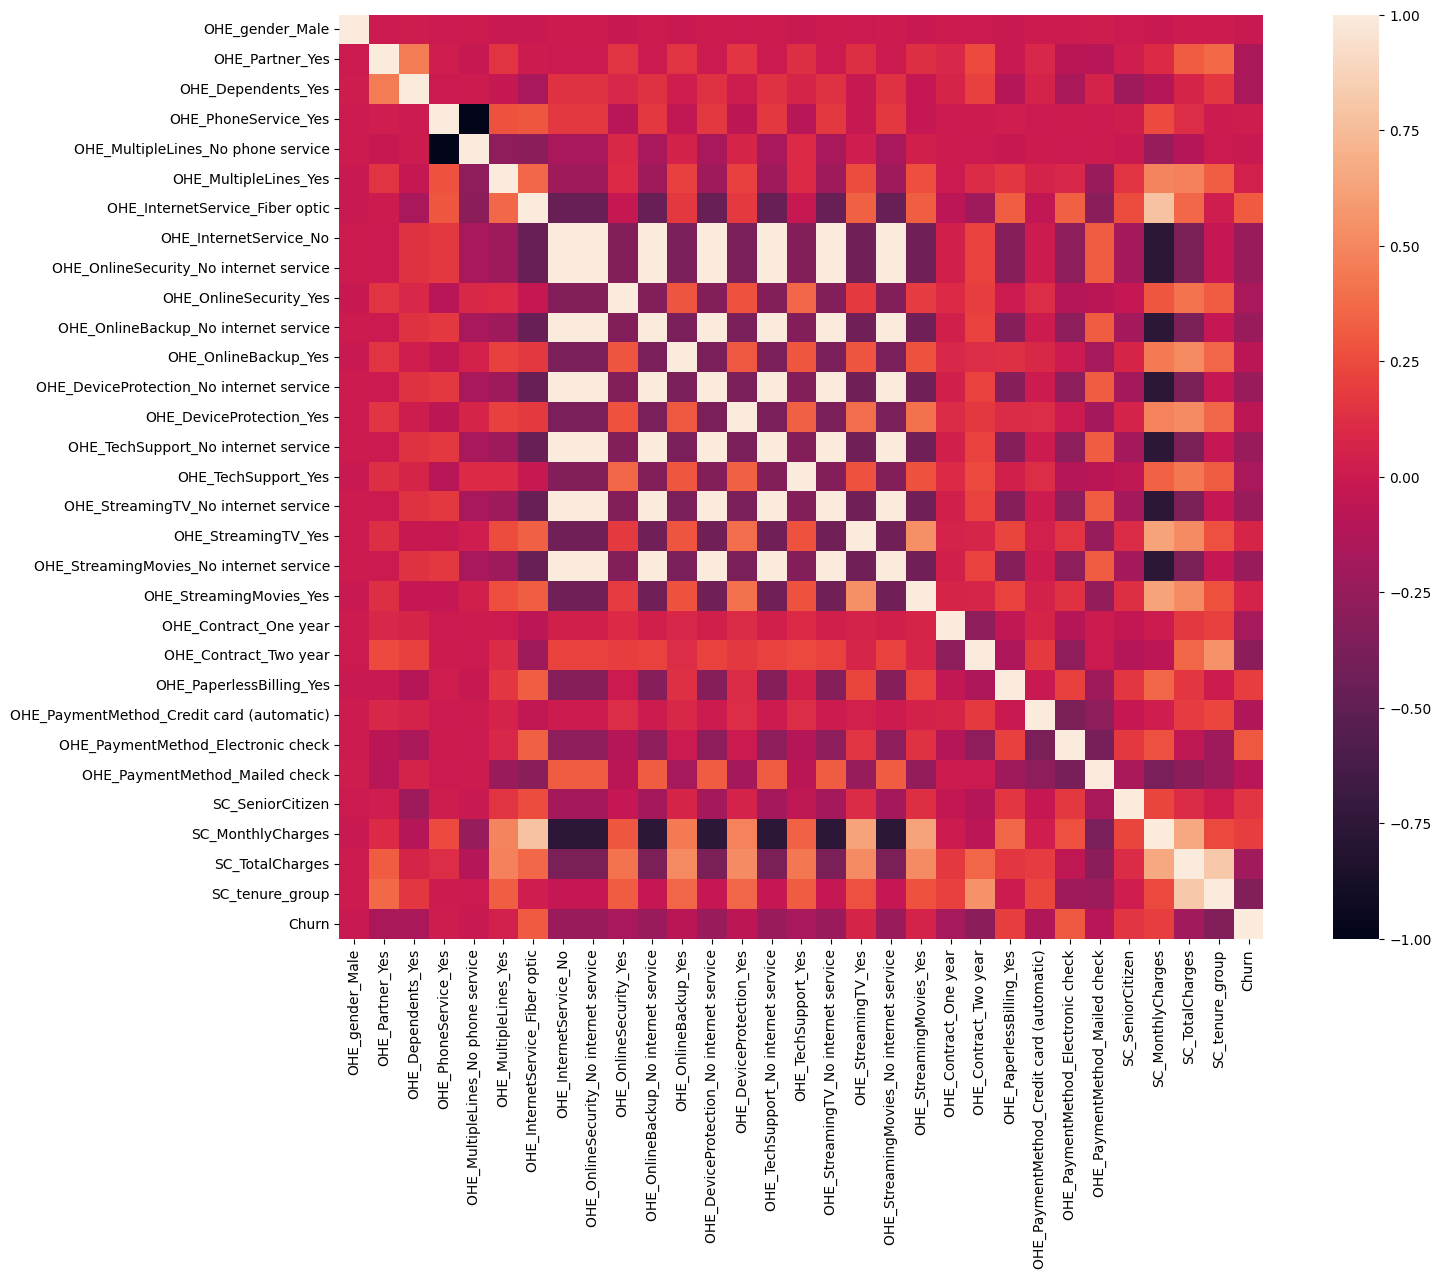

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(new_df.corr(), square=True)
plt.show()

In [ ]:
new_df.corr()['Churn'].sort_values()

,Churn
SC_tenure_group,-0.340311
OHE_Contract_Two year,-0.301552
OHE_InternetService_No,-0.227578
OHE_TechSupport_No internet service,-0.227578
OHE_DeviceProtection_No internet service,-0.227578
OHE_StreamingMovies_No internet service,-0.227578
OHE_OnlineBackup_No internet service,-0.227578
OHE_OnlineSecurity_No internet service,-0.227578
OHE_StreamingTV_No internet service,-0.227578
SC_TotalCharges,-0.199484


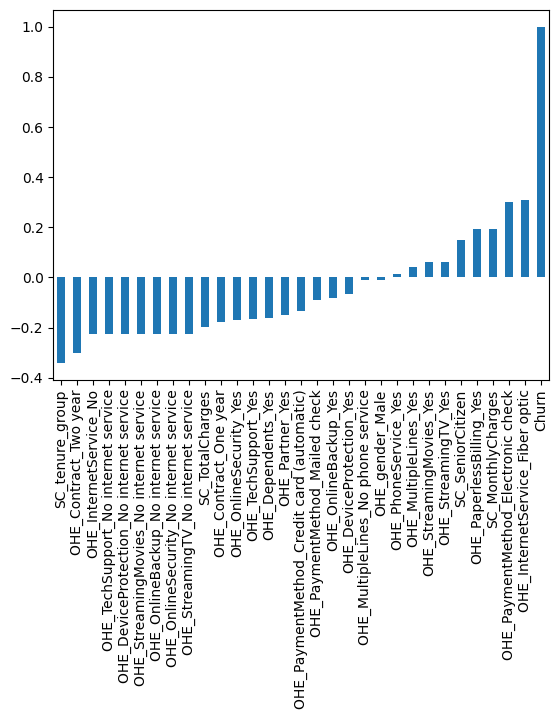

In [ ]:
new_df.corr()['Churn'].sort_values().plot(kind='bar')
plt.show()

Here are the observations based on the last two graphs:

**Heatmap:**

*   The heatmap provides a visual representation of the correlation matrix of the preprocessed features and the 'Churn' variable.
*   Areas of the heatmap with warmer colors (closer to red) indicate stronger positive correlations, while areas with cooler colors (closer to blue) indicate stronger negative correlations.
*   The diagonal line of the heatmap represents the correlation of a variable with itself, which is always 1 (strong positive correlation).
*   By examining the 'Churn' row (or column) in the heatmap, we can quickly identify which features have the strongest positive or negative correlations with customer churn. Features with brighter colors in this row/column are more strongly associated with churn.

**Correlation Bar Plot with Churn:**

*   This bar plot specifically focuses on the correlation of each preprocessed feature with the 'Churn' variable.
*   The height of each bar represents the correlation coefficient between the feature and Churn.
*   Bars extending above the x-axis indicate positive correlations, meaning that as the value of the feature increases, the likelihood of churn also tends to increase.
*   Bars extending below the x-axis indicate negative correlations, meaning that as the value of the feature increases, the likelihood of churn tends to decrease.
*   Features with taller bars (either positive or negative) have a stronger linear relationship with churn and are likely more important predictors of churn.
*   This plot is a more direct way to see which features have the most significant impact on churn compared to the heatmap, as it clearly orders the correlations by strength.